# Task 1.2: Event Research and Compilation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the oil prices data for reference
df = pd.read_csv('../../data/raw/BrentOilPrices.csv')

def parse_date(date_str):
    try:
        if '-' in date_str:
            return pd.to_datetime(date_str, format='%d-%b-%y')
        else:
            return pd.to_datetime(date_str, format='%b %d, %Y')
    except:
        return pd.NaT

df['Date'] = df['Date'].apply(parse_date)
df = df.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)

print(f"Data period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total observations: {len(df)}")

Data period: 1987-05-20 to 2022-11-14
Total observations: 9011


In [3]:
# Define major events affecting oil prices
major_events = [
    {'date': '1987-10-19', 'event': 'Black Monday Stock Market Crash', 'category': 'Economic Crisis'},
    {'date': '1990-08-02', 'event': 'Iraq Invasion of Kuwait', 'category': 'Geopolitical Conflict'},
    {'date': '1991-01-17', 'event': 'Gulf War Begins', 'category': 'Geopolitical Conflict'},
    {'date': '1997-07-02', 'event': 'Asian Financial Crisis Begins', 'category': 'Economic Crisis'},
    {'date': '1998-12-10', 'event': 'Oil Price Reaches Historic Low', 'category': 'Market Event'},
    {'date': '2001-09-11', 'event': '9/11 Terrorist Attacks', 'category': 'Geopolitical Conflict'},
    {'date': '2003-03-20', 'event': 'Iraq War Begins', 'category': 'Geopolitical Conflict'},
    {'date': '2008-07-03', 'event': 'Oil Price Reaches Historic High', 'category': 'Market Event'},
    {'date': '2008-09-15', 'event': 'Lehman Brothers Bankruptcy', 'category': 'Economic Crisis'},
    {'date': '2011-01-25', 'event': 'Arab Spring Begins', 'category': 'Geopolitical Conflict'},
    {'date': '2014-06-01', 'event': 'OPEC Production Increase', 'category': 'OPEC Decision'},
    {'date': '2016-11-30', 'event': 'OPEC Production Cut Agreement', 'category': 'OPEC Decision'},
    {'date': '2020-03-11', 'event': 'COVID-19 Declared Pandemic', 'category': 'Economic Crisis'},
    {'date': '2020-04-20', 'event': 'Oil Price Goes Negative', 'category': 'Market Event'},
    {'date': '2022-02-24', 'event': 'Russia Invades Ukraine', 'category': 'Geopolitical Conflict'},
    {'date': '2022-03-08', 'event': 'US Bans Russian Oil Imports', 'category': 'Economic Sanction'}
]

events_df = pd.DataFrame(major_events)
events_df['date'] = pd.to_datetime(events_df['date'])
events_df = events_df.sort_values('date').reset_index(drop=True)

print(f"Total events identified: {len(events_df)}")
print(events_df[['date', 'event', 'category']].to_string(index=False))

Total events identified: 16
      date                           event              category
1987-10-19 Black Monday Stock Market Crash       Economic Crisis
1990-08-02         Iraq Invasion of Kuwait Geopolitical Conflict
1991-01-17                 Gulf War Begins Geopolitical Conflict
1997-07-02   Asian Financial Crisis Begins       Economic Crisis
1998-12-10  Oil Price Reaches Historic Low          Market Event
2001-09-11          9/11 Terrorist Attacks Geopolitical Conflict
2003-03-20                 Iraq War Begins Geopolitical Conflict
2008-07-03 Oil Price Reaches Historic High          Market Event
2008-09-15      Lehman Brothers Bankruptcy       Economic Crisis
2011-01-25              Arab Spring Begins Geopolitical Conflict
2014-06-01        OPEC Production Increase         OPEC Decision
2016-11-30   OPEC Production Cut Agreement         OPEC Decision
2020-03-11      COVID-19 Declared Pandemic       Economic Crisis
2020-04-20         Oil Price Goes Negative          Market Eve

Events by Category:
category
Geopolitical Conflict    6
Economic Crisis          4
Market Event             3
OPEC Decision            2
Economic Sanction        1
Name: count, dtype: int64


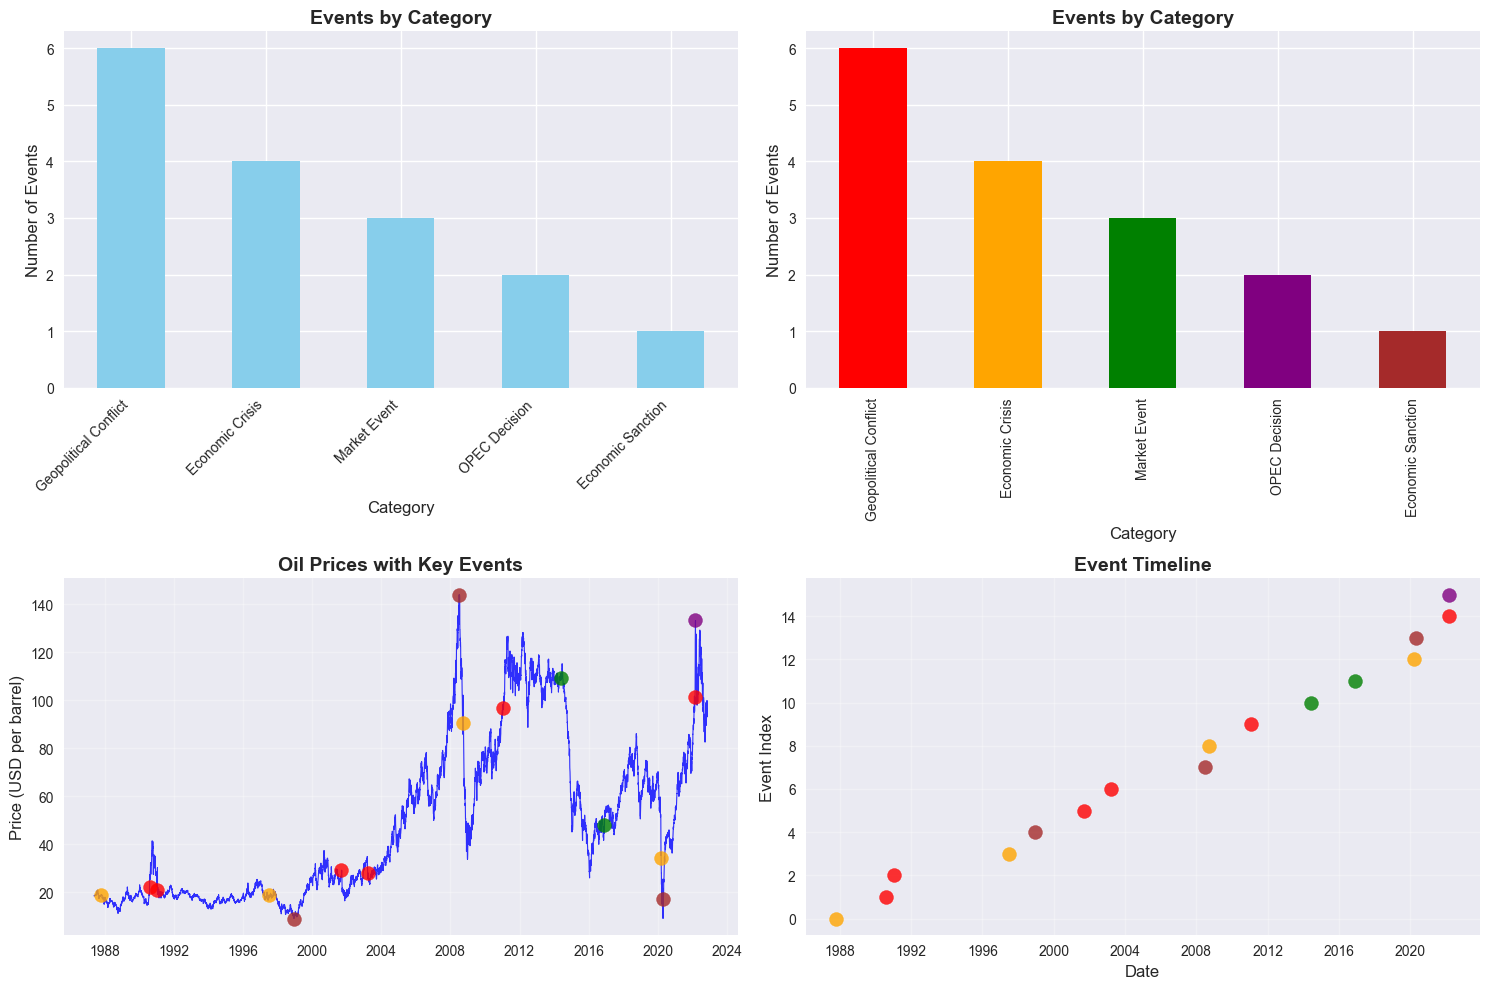

In [4]:
# Analyze events by category
category_counts = events_df['category'].value_counts()
print("Events by Category:")
print(category_counts)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
category_counts.plot(kind='bar', color='skyblue')
plt.title('Events by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
impact_counts = events_df['category'].value_counts()
colors = ['red', 'orange', 'green', 'purple', 'brown']
impact_counts.plot(kind='bar', color=colors)
plt.title('Events by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)

# Timeline visualization
plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['Price'], linewidth=0.8, alpha=0.8, color='blue')
plt.title('Oil Prices with Key Events', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add event markers
colors_map = {
    'Geopolitical Conflict': 'red',
    'Economic Crisis': 'orange', 
    'OPEC Decision': 'green',
    'Economic Sanction': 'purple',
    'Market Event': 'brown'
}

for idx, event in events_df.iterrows():
    closest_date = df['Date'].iloc[(df['Date'] - event['date']).abs().argsort()[:1]].iloc[0]
    if closest_date in df['Date'].values:
        price_on_date = df[df['Date'] == closest_date]['Price'].iloc[0]
        plt.scatter(closest_date, price_on_date, 
                   color=colors_map.get(event['category'], 'gray'), 
                   s=100, alpha=0.8, zorder=5)

# Event timeline
plt.subplot(2, 2, 4)
for idx, event in events_df.iterrows():
    color = colors_map.get(event['category'], 'gray')
    plt.scatter(event['date'], idx, color=color, s=100, alpha=0.8)

plt.title('Event Timeline', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Event Index', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# Analyze the impact of events on oil prices
def analyze_event_impact(event_date, price_data, window_days=30):
    event_date = pd.to_datetime(event_date)
    closest_date = price_data['Date'].iloc[(price_data['Date'] - event_date).abs().argsort()[:1]].iloc[0]
    
    before_event = price_data[price_data['Date'] < closest_date].tail(window_days)
    after_event = price_data[price_data['Date'] > closest_date].head(window_days)
    
    if len(before_event) > 0 and len(after_event) > 0:
        avg_before = before_event['Price'].mean()
        avg_after = after_event['Price'].mean()
        price_change = avg_after - avg_before
        percent_change = (price_change / avg_before) * 100
        
        return {
            'event_date': event_date,
            'closest_price_date': closest_date,
            'avg_price_before': avg_before,
            'avg_price_after': avg_after,
            'price_change': price_change,
            'percent_change': percent_change
        }
    return None

# Analyze all events
event_impacts = []
for idx, event in events_df.iterrows():
    impact = analyze_event_impact(event['date'], df)
    if impact:
        impact['event'] = event['event']
        impact['category'] = event['category']
        event_impacts.append(impact)

impacts_df = pd.DataFrame(event_impacts)
print("Event Impact Analysis (30-day window):")
print(impacts_df[['event', 'category', 'percent_change', 'price_change']].round(2))

Event Impact Analysis (30-day window):
                              event               category  percent_change  \
0   Black Monday Stock Market Crash        Economic Crisis           -1.88   
1           Iraq Invasion of Kuwait  Geopolitical Conflict           71.11   
2                   Gulf War Begins  Geopolitical Conflict          -27.78   
3     Asian Financial Crisis Begins        Economic Crisis            2.48   
4    Oil Price Reaches Historic Low           Market Event           -2.02   
5            9/11 Terrorist Attacks  Geopolitical Conflict          -13.26   
6                   Iraq War Begins  Geopolitical Conflict          -22.71   
7   Oil Price Reaches Historic High           Market Event           -5.30   
8        Lehman Brothers Bankruptcy        Economic Crisis          -25.20   
9                Arab Spring Begins  Geopolitical Conflict           11.92   
10         OPEC Production Increase          OPEC Decision            0.90   
11    OPEC Production Cut

Asian Crisis (1998): Lowest price $9.10
Financial Crisis (2008-2009): Highest price $143.95
COVID-19 Crisis (2020): Lowest price $9.12


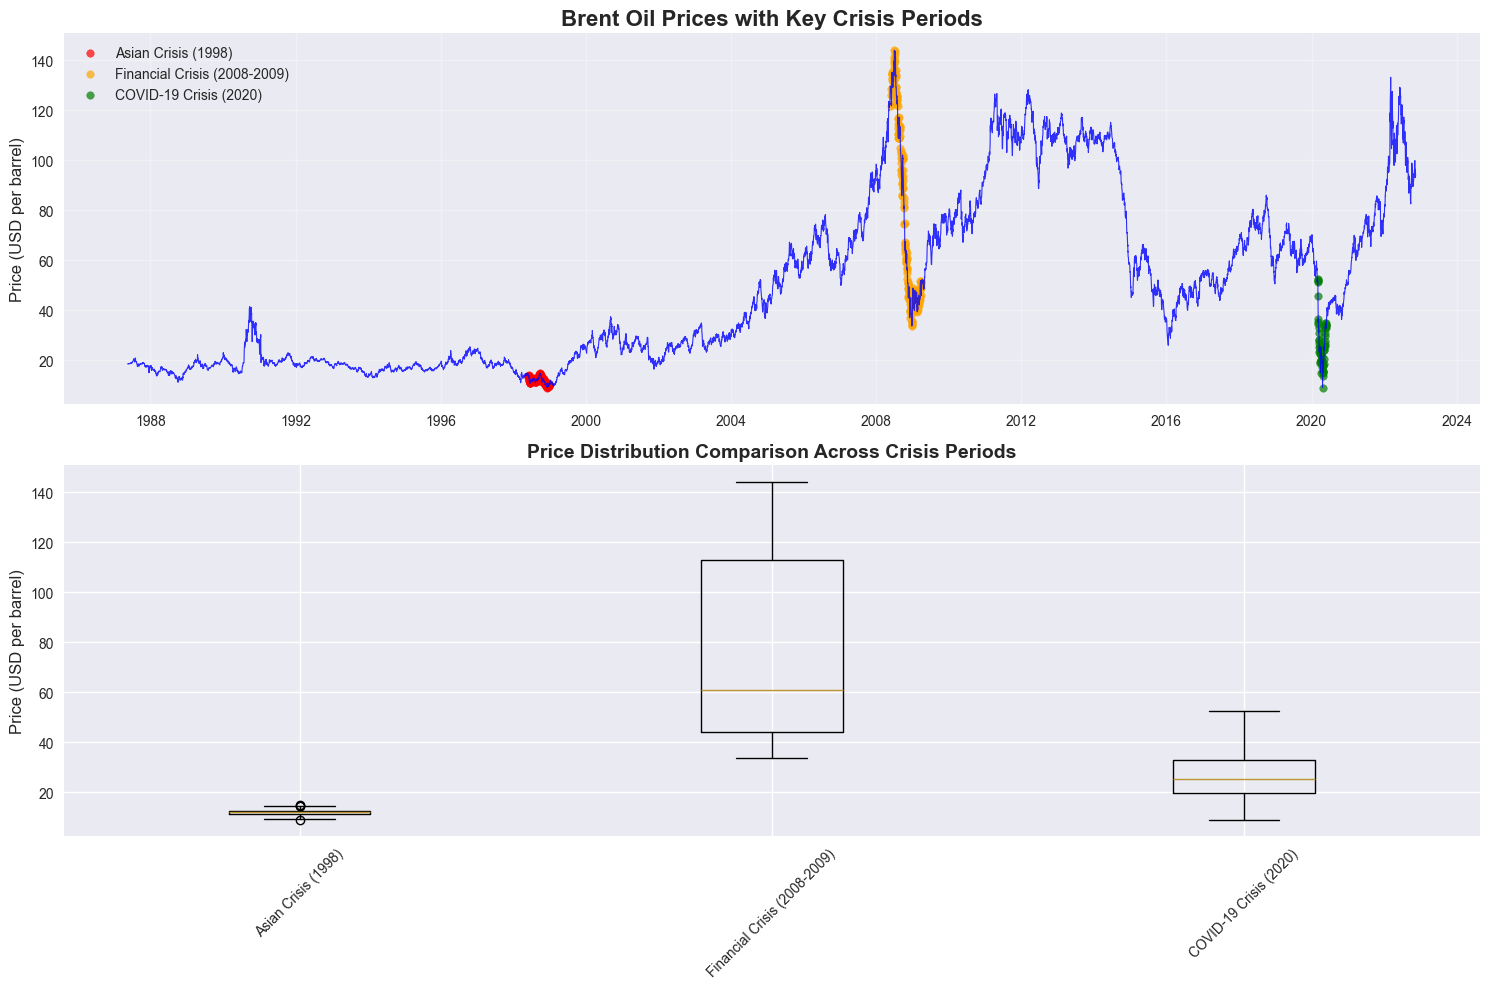

In [6]:
# Deep dive into key crisis periods
asian_crisis = df[(df['Date'] >= '1998-06-01') & (df['Date'] <= '1998-12-31')]
financial_crisis = df[(df['Date'] >= '2008-06-01') & (df['Date'] <= '2009-03-31')]
covid_crisis = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-05-31')]

print(f"Asian Crisis (1998): Lowest price ${asian_crisis['Price'].min():.2f}")
print(f"Financial Crisis (2008-2009): Highest price ${financial_crisis['Price'].max():.2f}")
print(f"COVID-19 Crisis (2020): Lowest price ${covid_crisis['Price'].min():.2f}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Price'], linewidth=0.8, alpha=0.8, color='blue')

plt.scatter(asian_crisis['Date'], asian_crisis['Price'], 
           color='red', s=30, alpha=0.7, label='Asian Crisis (1998)')
plt.scatter(financial_crisis['Date'], financial_crisis['Price'], 
           color='orange', s=30, alpha=0.7, label='Financial Crisis (2008-2009)')
plt.scatter(covid_crisis['Date'], covid_crisis['Price'], 
           color='green', s=30, alpha=0.7, label='COVID-19 Crisis (2020)')

plt.title('Brent Oil Prices with Key Crisis Periods', fontsize=16, fontweight='bold')
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

crisis_data = {
    'Asian Crisis (1998)': asian_crisis['Price'].values,
    'Financial Crisis (2008-2009)': financial_crisis['Price'].values,
    'COVID-19 Crisis (2020)': covid_crisis['Price'].values
}

plt.subplot(2, 1, 2)
plt.boxplot(crisis_data.values(), labels=crisis_data.keys())
plt.title('Price Distribution Comparison Across Crisis Periods', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# Save the events dataset
events_df.to_csv('../../data/events/major_oil_events.csv', index=False)
impacts_df.to_csv('../../data/events/event_impacts_analysis.csv', index=False)

print("Events dataset saved to data/events/major_oil_events.csv")
print("Impact analysis saved to data/events/event_impacts_analysis.csv")

Events dataset saved to data/events/major_oil_events.csv
Impact analysis saved to data/events/event_impacts_analysis.csv
